In [1]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib

In [2]:
import pandas as pd #
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

In [3]:
def dynamic_label_encode(df):
    encoded_df = df.copy()
    label_encoders = {}

    for column in df.select_dtypes(include=['object']).columns:
        le = preprocessing.LabelEncoder()
        encoded_df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return encoded_df, label_encoders

In [4]:
df=pd.read_csv("StudentsPerformance.csv")
encoded_df, label_encoders = dynamic_label_encode(df)

In [5]:
encoded_df

Student_id  gender  parental level of education  test preparation course  \
0             1       0                            1                        2   
1             2       0                            4                        1   
2             3       0                            3                        2   
3             4       1                            0                        0   
4             5       1                            4                        2   
..          ...     ...                          ...                      ...   
994         995       1                            4                        2   
995         996       1                            0                        0   
996         997       1                            4                        2   
997         998       0                            1                        2   
998         999       1                            0                        0   

     Software Engineering score  Machine Learningscore  DBMS score  \
0                            72                     72          74   
1                            69                     90          88   
2                            90                     95          93   
3                            47                     57          44   
4                            76                     78          75   
..                          ...                    ...         ...   
994                          81                     74          81   
995                          90                     85          89   
996                          65                     89          87   
997                          75                    100          71   
998                          70                     82          44   

     Elective 1 score  Elective 2 score  Attendance  Study hours/Day  \
0                  88                69          86                3   
1                  76                63          86                1   
2                  95                56          86                2   
3                  94                40          85                2   
4                  77                97          86                2   
..                ...               ...         ...              ...   
994                89                65          47                3   
995                69                40          75                1   
996                63                57          80                4   
997                76                69          52                4   
998                75                56          58                2   

     Assignment marks  Time spent on social media in mins  \
0                  15                                  90   
1                  15                                  90   
2                  15                                  90   
3                  15                                  90   
4                  15                                  90   
..                ...                                 ...   
994                18                                 100   
995                12                                 100   
996                11                                 100   
997                13                                 100   
998                20                                 100   

     Participation in extra cirricular activities  Current Sem percentage  \
0                                               0                    75.0   
1                                               2                    77.2   
2                                               0                    85.8   
3                                               2                    56.4   
4                                               0                    80.6   
..                                            ...                     ...   
994                                             1     

In [6]:
to_scale = [col for col in encoded_df.columns if encoded_df[col].max()>1]
scaler = RobustScaler()
scaled =scaler.fit_transform(encoded_df[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# replace original columns with scaled columns
for col in scaled:
    encoded_df[col] = scaled[col]

In [10]:
encoded_df1 = encoded_df[:999]
X_test=encoded_df1.drop(["Pass/Fail",'Current Sem percentage','Student_id'],axis=1)
var1=X_test
model_filename1 = "models/RandomForestClassifier_Classify_model.joblib"
print(model_filename1)
loaded_model1 = joblib.load(model_filename1)
new_predictions = loaded_model1.predict(var1)

models/RandomForestClassifier_Classify_model.joblib


In [11]:
from sklearn.metrics import confusion_matrix
matrixresult = confusion_matrix(encoded_df1["Pass/Fail"],new_predictions, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

Confusion matrix : 
 [[974   1]
 [  3  21]]


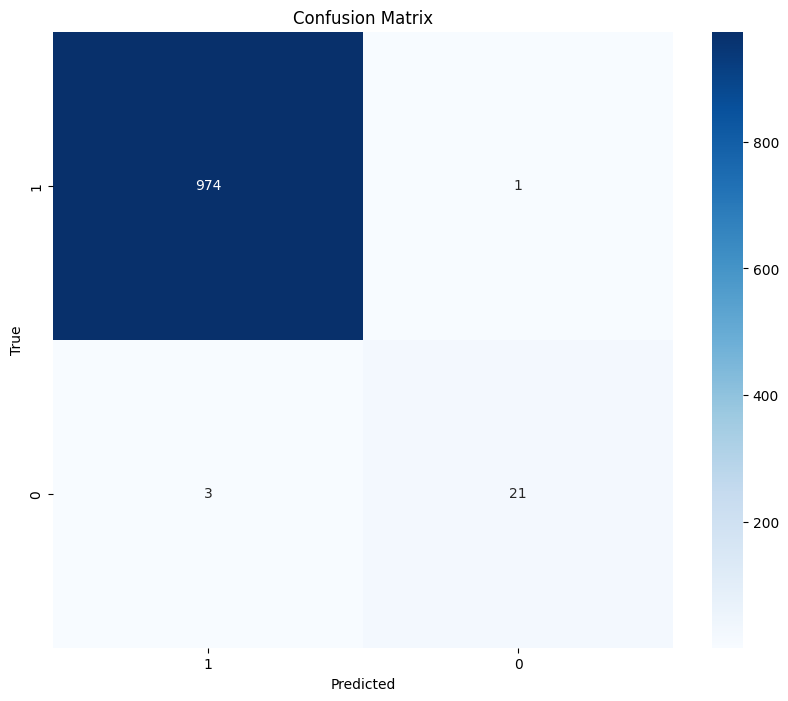

In [12]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrixresult, annot=True, fmt="d", cmap="Blues", xticklabels=["1", "0"], yticklabels=["1", "0"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")  # Save the plot as an image file
plt.show()

In [1]:
import pandas as pd

In [5]:
df=pd.read_csv("StudentsPerformance.csv")
df

Student_id  gender parental level of education test preparation course  \
0             1  female           bachelor's degree                    none   
1             2  female                some college               completed   
2             3  female             master's degree                    none   
3             4    male          associate's degree      Partialy completed   
4             5    male                some college                    none   
..          ...     ...                         ...                     ...   
994         995    male                some college                    none   
995         996    male          associate's degree      Partialy completed   
996         997    male                some college                    none   
997         998  female           bachelor's degree                    none   
998         999    male          associate's degree      Partialy completed   

     Software Engineering score  Machine Learningscore  DBMS score  \
0                            72                     72          74   
1                            69                     90          88   
2                            90                     95          93   
3                            47                     57          44   
4                            76                     78          75   
..                          ...                    ...         ...   
994                          81                     74          81   
995                          90                     85          89   
996                          65                     89          87   
997                          75                    100          71   
998                          70                     82          44   

     Elective 1 score  Elective 2 score  Attendance  Study hours/Day  \
0                  88                69          86                3   
1                  76                63          86                1   
2                  95                56          86                2   
3                  94                40          85                2   
4                  77                97          86                2   
..                ...               ...         ...              ...   
994                89                65          47                3   
995                69                40          75                1   
996                63                57          80                4   
997                76                69          52                4   
998                75                56          58                2   

     Assignment marks  Time spent on social media in mins  \
0                  15                                  90   
1                  15                                  90   
2                  15                                  90   
3                  15                                  90   
4                  15                                  90   
..                ...                                 ...   
994                18                                 100   
995                12                                 100   
996                11                                 100   
997                13                                 100   
998                20                                 100   

    Participation in extra cirricular activities  Current Sem percentage  \
0                                             no                    75.0   
1                                            yes                    77.2   
2                                             no                    85.8   
3                                            yes                    56.4   
4                                             no                    80.6   
..                                           ...                     ...   
994                                  partial yes                    78.0   
995      

In [15]:
a=df[df['Student_id'] == 250][['Software Engineering score','Machine Learningscore','DBMS score','Elective 1 score','Elective 2 score']]

In [23]:
col_vals=a.values.tolist()[0]
col_vals

[68, 60, 53, 66, 53]

In [22]:
# Get the list of all column names from headers
column_headers = list(a.columns.values)
column_headers

['Software Engineering score',
 'Machine Learningscore',
 'DBMS score',
 'Elective 1 score',
 'Elective 2 score']